<a href="https://colab.research.google.com/github/kynemre/DataMining/blob/main/05_%C4%B0%C5%9Ften_%C4%B0lk_Kimler_Ayr%C4%B1lacak%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# İşten İlk Kimler Ayrılacak?

Bu uygulamada kullanacağımız veri seti bir şirkete ait insan kaynakları departmanı tarafından toplanmış 14999 kişiye ait verileri içerir. (HR.csv)
Veri setimizde:
* Çalışan memnuniyet oranı, (satisfaction_level) (0-1 aralığında)
* Son değerlendirme (last_evaluation) (0-1 aralığında)
* Proje sayısı (number_project)
* Ortalama aylık çalışma süresi (average_monthly_hours)
* Şirkette geçirilen yıl (time_spent_company)
* İş kazası geçirilip geçirilmediği (work_accident)*
* Son 5 yılda promosyon alıp almadığı (promotion_last_5_years)
* Departman(sales)
* Maaş (salary) - (low, medium or high)
* Çalışanın işten ayrılıp ayrılmadığı (left)

Şeklinde tanımlanmış attribute lar bulunmaktadır. Çalışanın işten ayrılıp ayrılmadığı (left) bilgisi etiket değeri olarak alınacak ve eğitim veri seti kullanılarak, test veri seti içerisinde yer alan çalışanların işten ayrılıp ayrılmadığı tahmin edilecektir.

## Veri Okuma ve Düzenleme

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
adress = r'https://raw.githubusercontent.com/kynemre/DataMining/main/data/HR.csv'
data = pd.read_csv(adress)
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [ ]:
col_list = list(data.columns)
col_list.remove('left')
col_list+=['left']
data = data[col_list]
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1


In [ ]:
data.isna().any().any()

False

In [ ]:
salary_dict = dict(enumerate(data['salary'].unique()))
sales_dict = dict(enumerate(data['sales'].unique()))

In [ ]:
for i,key in salary_dict.items():
    data['salary'] = data['salary'].apply(lambda x:x.replace(key,str(i)))
data['salary'] = data['salary'].astype(int)

In [ ]:
for i,key in sales_dict.items():
    data['sales'] = data['sales'].apply(lambda x:x.replace(key,str(i)))
data['sales'] = data['sales'].astype(int)

In [ ]:
data.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.02,3.34,0.59,0.24
std,0.25,0.17,1.23,49.94,1.46,0.35,0.14,2.82,0.64,0.43
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,3.00,1.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,6.00,1.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,9.00,2.00,1.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
print("{} adet örnek, {} adet nitelik var.".format(*data.shape))

14999 adet örnek, 10 adet nitelik var.


In [ ]:
X =data[data.columns[:-1]]
y = data['left']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        0.5       ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 0.44444444,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 0.44444444,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 0.44444444,
        0.        ]])

In [ ]:
y = y.values.reshape(-1,1)
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state = 42)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (13499, 9)
y_train.shape (13499, 1)
X_test.shape (1500, 9)
y_test.shape (1500, 1)


## Yapay Sinir Ağı Modeli

In [ ]:
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1],))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
opt= optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

mc = ModelCheckpoint('checkpoint.h5',save_best_only=True,monitor='val_loss',mode='min')

model.fit(X_train, y_train,
          batch_size=64,
          epochs=30,
          validation_split=0.2,
          callbacks=[mc])

Epoch 1/30
169/169 [==============================] - 1s 2ms/step - loss: 0.6547 - acc: 0.6464 - val_loss: 0.5062 - val_acc: 0.7637
Epoch 2/30
169/169 [==============================] - 0s 1ms/step - loss: 0.4749 - acc: 0.7801 - val_loss: 0.4504 - val_acc: 0.7978
Epoch 3/30
169/169 [==============================] - 0s 1ms/step - loss: 0.4303 - acc: 0.7943 - val_loss: 0.4198 - val_acc: 0.7941
Epoch 4/30
169/169 [==============================] - 0s 1ms/step - loss: 0.4118 - acc: 0.7985 - val_loss: 0.3956 - val_acc: 0.8167
Epoch 5/30
169/169 [==============================] - 0s 1ms/step - loss: 0.3876 - acc: 0.8344 - val_loss: 0.3782 - val_acc: 0.8389
Epoch 6/30
169/169 [==============================] - 0s 1ms/step - loss: 0.3639 - acc: 0.8433 - val_loss: 0.3597 - val_acc: 0.8515
Epoch 7/30
169/169 [==============================] - 0s 1ms/step - loss: 0.3576 - acc: 0.8515 - val_loss: 0.3481 - val_acc: 0.8670
Epoch 8/30
169/169 [==============================] - 0s 1ms/step - loss: 0.

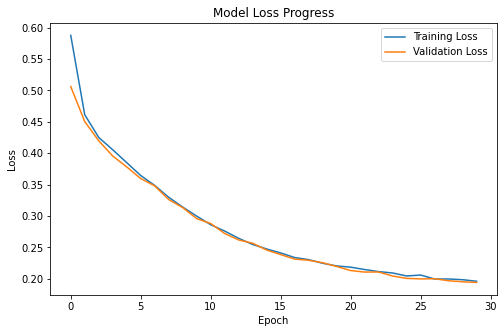

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history['loss'], label='Training Loss');
plt.plot(model.history.history['val_loss'], label='Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.title('Model Loss Progress');
plt.legend();

0.9518518447875977


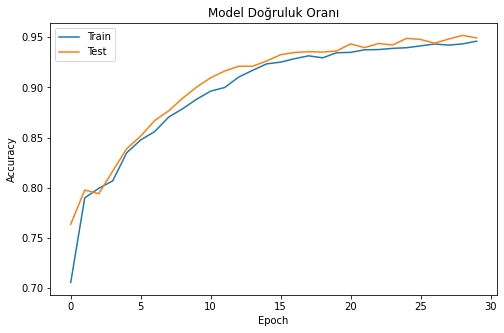

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history['acc'], label='Train')
plt.plot(model.history.history['val_acc'], label='Test')
plt.title('Model Doğruluk Oranı')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
print(max(model.history.history['val_acc']))

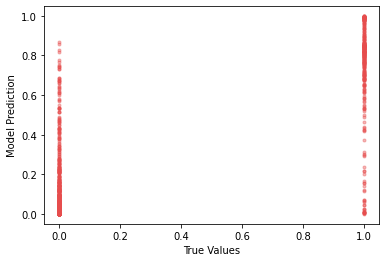

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.', color=(.9,.3,.3,.4));
plt.ylabel('Model Prediction');
plt.xlabel('True Values');

In [ ]:
test_acc_NN = round(model.evaluate(X_test, y_test)[1],4);
test_acc_NN

47/47 [==============================] - 0s 603us/step - loss: 0.1934 - acc: 0.9447


0.9447

## Karar Ağacı Modeli

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred_tree = clf.predict(X_test)
test_acc_tree = round(accuracy_score(y_test, y_pred_tree, normalize=True),4)
test_acc_tree

0.9553

In [ ]:
print("""
Sinir ağı modeli için test doğruluğu: %{NN}
Karar ağacı için test doğruluğu: %{tree}
""".format(NN=round(test_acc_NN*100,2),
           tree=test_acc_tree*100))


Sinir ağı modeli için test doğruluğu: %94.47
Karar ağacı için test doğruluğu: %95.53

